In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
start_time = time.time()
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/drive/MyDrive/ML-Phishing Detection Project/data/url_features.csv")

x = df.drop(columns=['url','protocol','domain','path','query','fragment','phishing'])
y = df['phishing']
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state = 42, stratify = y )

clf = LogisticRegression(penalty="l2",C=10,max_iter=1000, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)*100
train_accuracy = clf.score(X_train, y_train)*100
test_accuracy = clf.score(X_test, y_test)*100

print(f"LogisticRegression Accuracy: {acc}")
print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

print(f"\n--- Model Evaluation ended in {(time.time() - start_time)/60} minutes ---")

LogisticRegression Accuracy: 94.48246552456878
Training accuracy: 94.53105727356437
Test accuracy: 94.48246552456878

--- Model Evaluation ended in 1.2195839087168376 minutes ---


		-----CLASSIFICATION REPORT-----
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     98389
           1       0.98      0.82      0.89     38085

    accuracy                           0.94    136474
   macro avg       0.96      0.91      0.93    136474
weighted avg       0.95      0.94      0.94    136474

		-----CONFUSION MATRIX-----
[[97784   605]
 [ 6963 31122]]
		-----MATRIX CALC-----
Accuracy:  94.45462139308586
Misclassification Rate:  5.545378606914138
Recall:  81.71721150059078
Specificity:  99.38509386211874
Precision:  98.09310681753712


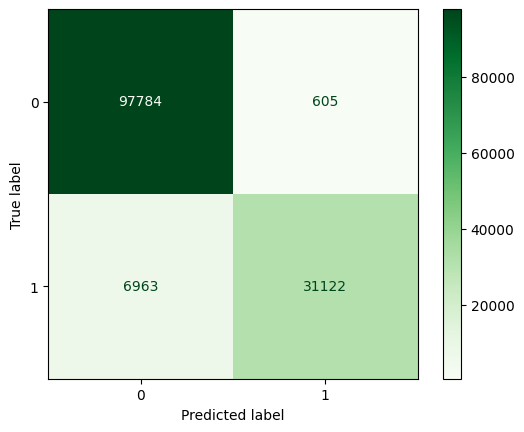

In [ ]:
from sklearn.metrics import  confusion_matrix, classification_report, ConfusionMatrixDisplay

print('\033[1m' + '\t\t-----CLASSIFICATION REPORT-----' + '\033[0m')
print(classification_report(y_test,y_pred))
print('\033[1m' + '\t\t-----CONFUSION MATRIX-----' + '\033[0m')
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot(cmap = 'Greens', values_format='')

print('\033[1m' + '\t\t-----MATRIX CALC-----' + '\033[0m')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Accuracy: ", ((tn + tp) / (tn + fp + fn + tp))*100)
print('Misclassification Rate: ', ((fp+fn)/(tp+fp+tn+fn))*100)
print("Recall: ", (tp / (tp + fn))*100)
print("Specificity: ", (tn / (tn + fp))*100)
print("Precision: ", (tp / (tp + fp))*100)

In [ ]:
import numpy as np

coefficients = clf.coef_[0]

feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

col_widths = [27, 10]
print('{:<{}} {:>{}}\n'.format('\033[1m    Features\033[0m', col_widths[0], '\033[1m           Importance\033[0m', col_widths[1]))

for index, row in feature_importance.iterrows():
  print('{:<{}} {:>{}}'.format(row["Feature"], col_widths[0], row["Importance"], col_widths[1]))

    Features                   Importance

has_Login                   17.50104731596883
qty_slash_url               17.081183381852934
qty_slash_query             17.07447575442481
qty_slash_path              15.593042042519762
is_Domain_Ip                13.390253867250552
fragment_length             8.262890358688013
domain_length               8.190691646606577
query_length                8.152779676465919
path_length                 8.102829702824081
url_length                  8.08924680042928
qty_questionmark_url        7.782155913174315
redirection                 4.103847946602051
qty_questionmark_query      2.6621056912247427
qty_hashtag_url             1.7503123607980398
qty_dot_domain              1.5527849024752542
qty_space_url               1.3967219137540452
qty_at_query                1.2732887325157511
qty_equal_query             1.2387965290096226
get_Depth                   1.1292673252545378
qty_space_path              1.0647616851107968
qty_equal_path             

In [ ]:
import pickle

with open('/content/drive/MyDrive/ML-Phishing Detection Project/model/model.pkl', 'wb') as f:
    pickle.dump(clf, f)